In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
def normalise(df):
    return (df - df.min()) / (df.max() - df.min())

### Using new case numbers to predict number of healthcare workers infected on same day.

In [3]:
df = pd.read_csv("data/new_daily_cases.csv")
df = df.drop([0])
df = normalise(df)

X = np.column_stack((np.array(df['ConfirmedCovidCases']), np.array(df['HospitalisedCovidCases']), np.array(df['RequiringICUCovidCases'])))
y = np.array(df['HealthcareWorkersCovidCases'])


In [4]:
C = 2000
model = make_pipeline(PolynomialFeatures(5), linear_model.Lasso(alpha=1/C))
model.fit(X, y)

y_pred = model.predict(X)

#### Cross Validation

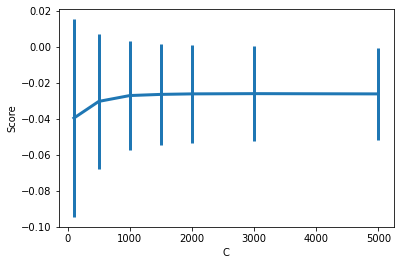

In [5]:
mean_error=[]
std_error=[]
C_range = [100,500,1000,1500, 2000, 3000,5000]
for Cval in C_range:
    model1 = make_pipeline(PolynomialFeatures(5), linear_model.Lasso(alpha=1 / Cval))
    scores = cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.errorbar(C_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

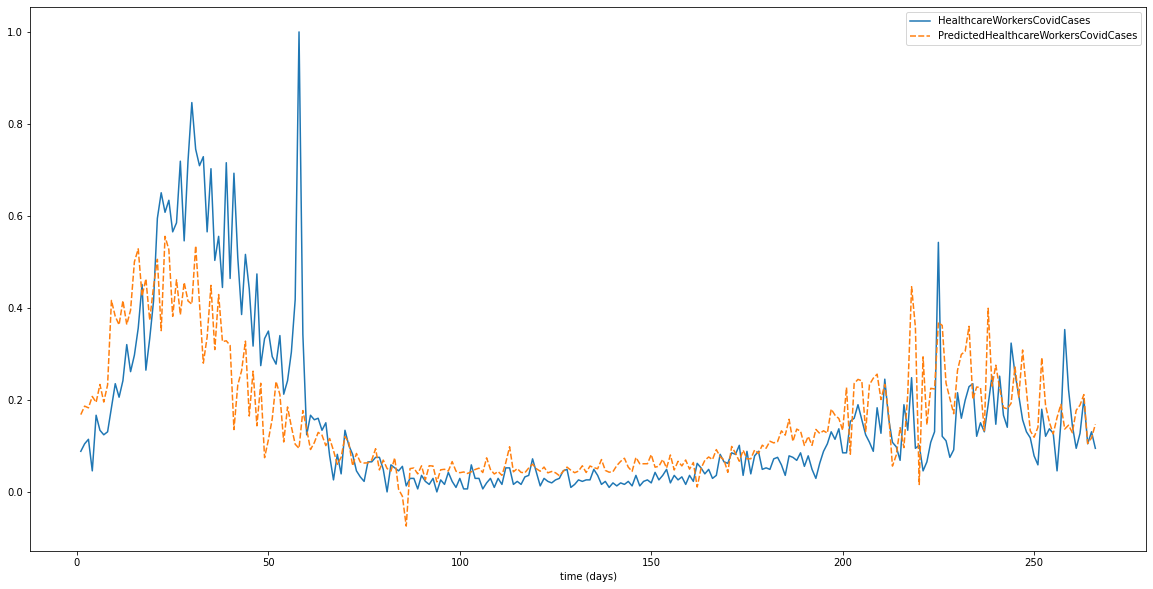

In [6]:
df_new = pd.DataFrame()
df_new['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases']
df_new['PredictedHealthcareWorkersCovidCases'] = y_pred

fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_new)
plt.legend()
plt.xlabel('time (days)')
plt.show()

### Using new case numbers from previous 3 days to predict healthcare worker cases.

In [7]:
X2 = np.column_stack((X[:-3], X[1:-2], X[2:-1]))
y2 = y[3:]

In [8]:
C = 2000
model = make_pipeline(PolynomialFeatures(5), linear_model.Lasso(alpha=1/C))
model.fit(X2, y2)

y_pred = model.predict(X2)

#### Cross Validation

q:\python3.8\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002902072223909924, tolerance: 0.0008682936080605767
  model = cd_fast.enet_coordinate_descent(


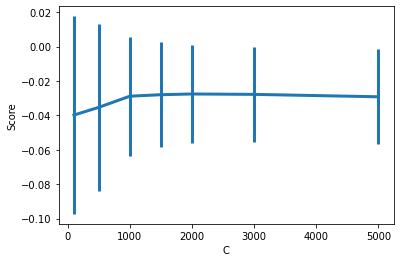

In [9]:
mean_error=[]
std_error=[]
C_range = [100,500,1000,1500, 2000, 3000,5000]
for Cval in C_range:
    model1 = make_pipeline(PolynomialFeatures(5), linear_model.Lasso(alpha=1 / Cval))
    scores = cross_val_score(model1, X2, y2, cv=5, scoring='neg_mean_squared_error')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.errorbar(C_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

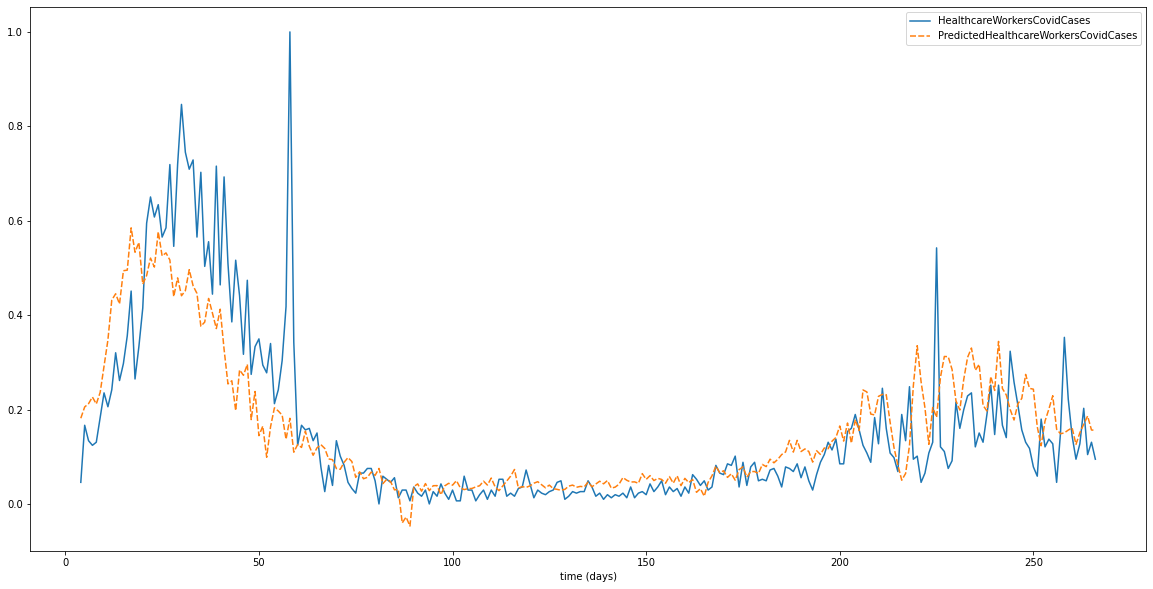

In [10]:
df_new = pd.DataFrame()
df_new['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases'][3:]
df_new['PredictedHealthcareWorkersCovidCases'] = y_pred

fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_new)
plt.legend()
plt.xlabel('time (days)')
plt.show()